<b>Vishal Maru</b>
<b>IT 418 Final Exam</b>
<b>Dr. Rajeev Bukralia</b>
<b>May 4, 2020</b>



In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

<b>A</b>

In [2]:
patients = pd.read_csv('patients.csv')

In [3]:
# cars.rename( columns={'Unnamed: 0':'car_names'}, inplace=True )

<b>B</b>

In [4]:
patients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


On seeing the first 5 rows we can clearly see some invlaid values where Skin Thickness and Insulin are zero

In [5]:
print ("median  ", patients.Pregnancies.median())
print (patients.Pregnancies.describe())

median   3.0
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64


In [6]:
print ("median  ", patients.Glucose.median())
print (patients.Glucose.describe())

median   117.0
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


In [7]:
print ("median  ", patients.BloodPressure.median())
print (patients.BloodPressure.describe())

median   72.0
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


In [8]:
print ("median  ", patients.SkinThickness.median())
print (patients.SkinThickness.describe())

median   23.0
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64


In [9]:
print ("median  ", patients.Insulin.median())
print (patients.Insulin.describe())

median   30.5
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64


In [10]:
print ("median  ", patients.BMI.median())
print (patients.BMI.describe())

median   32.0
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64


In [11]:
print ("median  ", patients.Pedigree.median())
print (patients.Pedigree.describe())

median   0.3725
count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: Pedigree, dtype: float64


In [12]:
print ("median  ", patients.Age.median())
print (patients.Age.describe())

median   29.0
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64


Number of observations for each variable is the same which is 768. 

<b>D</b>

In [13]:
patients.min()

Pregnancies       0.000
Glucose           0.000
BloodPressure     0.000
SkinThickness     0.000
Insulin           0.000
BMI               0.000
Pedigree          0.078
Age              21.000
Diagnosis         0.000
dtype: float64

In [14]:
def fill_missing_glucose(value):
    
    if value == 0:
        return 117
    else:
        return value
    
patients['Glucose']=patients.apply(lambda row:fill_missing_glucose(row['Glucose']), axis=1)

In [15]:
patients.Glucose.min()

44.0

In [16]:
def fill_missing_bp(value):
    
    if value == 0:
        return 72
    else:
        return value
    
patients['BloodPressure']=patients.apply(lambda row:fill_missing_glucose(row['BloodPressure']), axis=1)

In [17]:
def fill_missing_st(value):
    
    if value == 0:
        return 23
    else:
        return value
    
patients['SkinThickness']=patients.apply(lambda row:fill_missing_glucose(row['SkinThickness']), axis=1)

In [18]:
def fill_missing_insulin(value):
    
    if value == 0:
        return 30.5
    else:
        return value
    
patients['Insulin']=patients.apply(lambda row:fill_missing_glucose(row['Insulin']), axis=1)

In [19]:
def fill_missing_bmi(value):
    
    if value == 0:
        return 32
    else:
        return value
    
patients['BMI']=patients.apply(lambda row:fill_missing_glucose(row['BMI']), axis=1)

In [20]:
def fill_missing_Pedigree(value):
    
    if value == 0:
        return 0.3725
    else:
        return value
    
patients['Pedigree']=patients.apply(lambda row:fill_missing_glucose(row['Pedigree']), axis=1)

<b>E</b>

In [40]:
g_outliers = patients.Glucose.quantile([0.25, 0.75])
g_outliers

0.25     99.75
0.75    140.25
Name: Glucose, dtype: float64

In [21]:
outliers=[]
median = patients.Glucose.median()
def detectFill_outliers_g(value):
    
    if value < 99.75 or value > 140.25:
        outliers.append(value)
        return median
    else:
        return value
    
patients['Glucose']=patients.apply(lambda row:detectFill_outliers_g(row['Glucose']), axis=1)

if (len(outliers) > 0):
    print("outlier list: ", outliers)
else:
    print("No outliers in the column.")

In [38]:
bp_outliers = patients.BloodPressure.quantile([0.25, 0.75])
bp_outliers

0.25    64.0
0.75    82.0
Name: BloodPressure, dtype: float64

In [39]:
outliers=[]
median = patients.BloodPressure.median()
def detectFill_outliers_bp(value):
    
    if value < 64 or value > 82:
        outliers.append(value)
        return median
    else:
        return value
    
patients['BloodPressure']=patients.apply(lambda row:detectFill_outliers_bp(row['BloodPressure']), axis=1)

if (len(outliers) > 0):
    print("outlier list: ", outliers)
else:
    print("No outliers in the column.")

outlier list:  [40.0, 50.0, 117.0, 96.0, 92.0, 60.0, 117.0, 84.0, 30.0, 88.0, 84.0, 90.0, 94.0, 92.0, 58.0, 92.0, 60.0, 84.0, 92.0, 110.0, 56.0, 117.0, 50.0, 90.0, 50.0, 88.0, 117.0, 62.0, 58.0, 88.0, 92.0, 85.0, 90.0, 86.0, 48.0, 117.0, 44.0, 117.0, 108.0, 55.0, 62.0, 48.0, 50.0, 90.0, 60.0, 96.0, 56.0, 122.0, 58.0, 58.0, 85.0, 62.0, 62.0, 54.0, 92.0, 48.0, 60.0, 30.0, 58.0, 88.0, 84.0, 56.0, 60.0, 60.0, 52.0, 62.0, 86.0, 88.0, 52.0, 56.0, 90.0, 88.0, 90.0, 117.0, 60.0, 110.0, 60.0, 98.0, 62.0, 117.0, 55.0, 84.0, 58.0, 62.0, 60.0, 104.0, 84.0, 60.0, 85.0, 95.0, 62.0, 60.0, 90.0, 117.0, 60.0, 52.0, 86.0, 84.0, 90.0, 84.0, 54.0, 50.0, 85.0, 90.0, 86.0, 52.0, 84.0, 62.0, 56.0, 50.0, 117.0, 62.0, 117.0, 52.0, 117.0, 86.0, 62.0, 60.0, 62.0, 88.0, 86.0, 84.0, 86.0, 56.0, 88.0, 62.0, 48.0, 50.0, 62.0, 84.0, 117.0, 58.0, 98.0, 50.0, 60.0, 90.0, 86.0, 58.0, 117.0, 60.0, 117.0, 84.0, 86.0, 88.0, 46.0, 117.0, 62.0, 84.0, 62.0, 88.0, 50.0, 117.0, 108.0, 54.0, 86.0, 102.0, 58.0, 52.0, 60.0, 100.0,

In [24]:
preg_outliers = patients.Pregnancies.quantile([0.25, 0.75])
preg_outliers

0.25    1.0
0.75    6.0
Name: Pregnancies, dtype: float64

In [25]:
outliers=[]
median = patients.Pregnancies.median()
def detectFill_outliers_pregnancies(value):
    
    if value < 2 or value > 9:
        outliers.append(value)
        return median
    else:
        return value
    
patients['Pregnancies']=patients.apply(lambda row:detectFill_outliers_pregnancies(row['Pregnancies']), axis=1)

if (len(outliers) > 0):
    print("Pregnancies outlier list: ", outliers)
else:
    print("No outliers in Pregnancies column.")

Pregnancies outlier list:  [1.0, 1.0, 0.0, 10.0, 10.0, 10.0, 1.0, 0.0, 1.0, 1.0, 11.0, 10.0, 1.0, 13.0, 10.0, 11.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 1.0, 1.0, 0.0, 0.0, 13.0, 15.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 1.0, 1.0, 1.0, 17.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 11.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 12.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 10.0, 0.0, 1.0, 0.0, 12.0, 1.0, 1.0, 11.0, 0.0, 0.0, 10.0, 1.0, 13.0, 0.0, 0.0, 10.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 14.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 13.0, 1.0, 1.0, 10.0, 1.0, 12.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 13.0, 12.0, 1.0, 0.0, 1.0, 0.0, 0.0, 12.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 12.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 14.0, 1.0, 10.0, 1.0, 10.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,

In [26]:
patients.Pregnancies.max()

9.0

In [27]:
patients.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Diagnosis
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.998698,121.656250,74.437500,55.118490,136.776042,33.668359,0.471876,33.240885,0.348958
std,1.897297,30.438286,15.262202,41.062553,87.179770,12.178062,0.331329,11.760232,0.476951
min,2.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,3.000000,99.750000,64.000000,25.000000,117.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,73.000000,35.000000,117.000000,32.400000,0.372500,29.000000,0.000000
75%,5.000000,140.250000,82.000000,117.000000,127.250000,36.825000,0.626250,41.000000,1.000000
max,9.000000,199.000000,122.000000,117.000000,846.000000,117.000000,2.420000,81.000000,1.000000


In [42]:
st_outliers = patients.SkinThickness.quantile([0.25, 0.75])
st_outliers

0.25     25.0
0.75    117.0
Name: SkinThickness, dtype: float64

In [29]:
outliers=[]

def detectFill_outliers(value):
       
    if if value < 25 or value > 117:
        outliers.append(value)
        return patients.SkinThickness.median()
    else:
        return value
    
patients['SkinThickness']=patients.apply(lambda row:detectFill_outliers(row['SkinThickness']), axis=1)

if (len(outliers) > 0):
    print("Skin Thickness outlier list: ", outliers)
else:
    print("No outliers in Skin Thickness column.")

No outliers in Skin Thickness column.


In [43]:
i_outliers = patients.Insulin.quantile([0.25, 0.75])
i_outliers

0.25    117.00
0.75    127.25
Name: Insulin, dtype: float64

In [46]:
outliers=[]
    
def detectFill_outliers(value):
       
    if value < 117 or value > 127.25:
        outliers.append(value)
        return patients.Insulin.median()
    else:
        return value
    

    
patients['Insulin']=patients.apply(lambda row:detectFill_outliers(row['Insulin']), axis=1)

if (len(outliers) > 0):
    print("Insulin outlier list: ", outliers)
else:
    print("No outliers in Insulin column.")

Insulin outlier list:  [94.0, 168.0, 88.0, 543.0, 846.0, 175.0, 230.0, 83.0, 96.0, 235.0, 146.0, 115.0, 140.0, 110.0, 245.0, 54.0, 192.0, 207.0, 70.0, 240.0, 82.0, 36.0, 23.0, 300.0, 342.0, 304.0, 110.0, 142.0, 128.0, 38.0, 100.0, 90.0, 140.0, 270.0, 71.0, 71.0, 110.0, 176.0, 48.0, 64.0, 228.0, 76.0, 64.0, 220.0, 40.0, 152.0, 140.0, 18.0, 36.0, 135.0, 495.0, 37.0, 175.0, 51.0, 100.0, 100.0, 99.0, 135.0, 94.0, 145.0, 168.0, 225.0, 49.0, 140.0, 50.0, 92.0, 325.0, 63.0, 284.0, 204.0, 155.0, 485.0, 94.0, 135.0, 53.0, 114.0, 105.0, 285.0, 156.0, 78.0, 130.0, 48.0, 55.0, 130.0, 130.0, 92.0, 23.0, 495.0, 58.0, 114.0, 160.0, 94.0, 210.0, 48.0, 99.0, 318.0, 44.0, 190.0, 280.0, 87.0, 130.0, 175.0, 271.0, 129.0, 478.0, 190.0, 56.0, 32.0, 744.0, 53.0, 370.0, 37.0, 45.0, 192.0, 88.0, 176.0, 194.0, 680.0, 402.0, 55.0, 258.0, 375.0, 150.0, 130.0, 67.0, 56.0, 45.0, 57.0, 116.0, 278.0, 155.0, 135.0, 545.0, 220.0, 49.0, 75.0, 40.0, 74.0, 182.0, 194.0, 360.0, 215.0, 184.0, 135.0, 42.0, 105.0, 132.0, 148.

In [31]:
outliers=[]

    
def detectFill_outliers(value):
       
    if value < 117 or value > 127.25:
        outliers.append(value)
        return patients.Insulin.median()
    else:
        return value
    

    
patients['BMI']=patients.apply(lambda row:detectFill_outliers(row['BMi']), axis=1)
if (len(outliers) > 0):
    print("BMI outlier list: ", outliers)
else:
    print("No outliers in BMI column.")

No outliers in BMI column.


In [32]:
outliers=[]

def detectFill_outliers_pedigree(value):
    
    z_score = (value-patients.Pedigree.mean())/patients.Pedigree.std()
    
    if abs(z_score) > 3:
        outliers.append(value)
        return patients.Pedigree.median()
    else:
        return value
    
patients['Pedigree']=patients.apply(lambda row:fill_missing_glucose(row['Pedigree']), axis=1)

if (len(outliers) > 0):
    print("Pedigree outlier list: ", outliers)
else:
    print("No outliers in Pedigree column.")

No outliers in Pedigree column.


In [33]:
outliers=[]

def detectFill_outliers_age(value):
    
    z_score = (value-patients.Age.mean)/patients.Age.std()
    
    if abs(z_score) > 3:
        outliers.append(value)
        return patients.Age.median()
    else:
        return value
    
patients['Age']=patients.apply(lambda row:fill_missing_glucose(row['Age']), axis=1)

if (len(outliers) > 0):
    print("Age outlier list: ", outliers)
else:
    print("No outliers in Age column.")

No outliers in Age column.


<b>F</b>

Since There were no outliers detected using the z score method, no values were replaced with the median.

<b>G</b>

In [34]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

<b>H</b>

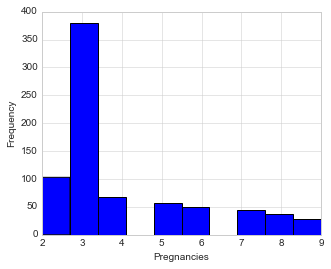

In [35]:
plt.rc('grid', linestyle="-")
plt.grid(color='0.8')

plt.ylabel("Frequency")
plt.xlabel("Pregnancies")
plt.hist(patients["Pregnancies"])

plt.show()

In [36]:
patients.Pregnancies.max()

9.0

<b>CHECKING THE MODEL ASSUMPTIONS</b>

<b>CHECKING THE INDEPENDENCE BETWEEN FEATURES</b>

It is observed that these two are in fact categorical. They only take set number of positions.

The value is really close to zero which means there is almost no correlation between the predictors

<b>CHECKING FOR MISSING VALUES</b>

No missing values

<b>MAKING SURE THE TARGET VARIABLE IS BINARY OR ORDINAL</b>

It is clear that am is binary because it only has two variables, 0 and 1. So the model assumption needs are met.

<b>CHECKING IF THE DATASET SIZE IS SUFFICIENT</b>

In this case we have two observations so we will need 100 observations, 50 for each variable.

Now, this dataset only has 32 observations which means our model will not be very reliable.

<b>DEPLOYING AND EVALUATING THE MODEL</b>

Lets scale the dataset first.

Next, Instantiate Logistic Regression Object

In [47]:
patients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Diagnosis
0,6.0,148.0,72.0,35.0,117.0,33.6,0.627,50.0,1
1,3.0,85.0,66.0,29.0,117.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,117.0,117.0,23.3,0.672,32.0,1
3,3.0,89.0,66.0,23.0,117.0,28.1,0.167,21.0,0
4,3.0,137.0,73.0,35.0,117.0,43.1,2.288,33.0,1


In [49]:
patients_data = patients.ix[:, 0:7]
patients_data_names = ['pregnancies', 'glucose', 'bp', 'st', 'i', 'bmi', 'p']

y = patients.ix[:, 8]

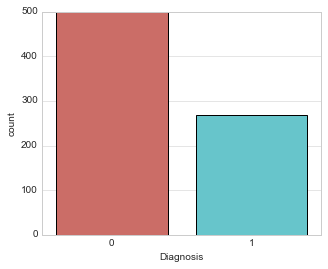

In [51]:
sb.countplot(x='Diagnosis', data=patients, palette='hls')

In [52]:
X = scale(patients_data)

In [53]:
LogReg = LogisticRegression()

LogReg.fit(X, y)
LogReg.score(X, y)

0.76302083333333337

In [55]:
model1 = LogReg.fit(X, y)
model1.summary()

AttributeError: 'LogisticRegression' object has no attribute 'summary'

We got a really high value so we have a good fit.

Now we will evaluate the model

In [ ]:
y_pred = LogReg.predict(X)

print(classification_report(y, y_pred))

Total prediction for the model is 0.82 and recall is 0.81. So, we know our model is adequate.

We will also calculate area under the curve (ROC)

In [ ]:
roc_auc_score(y, y_pred)

Area under the cruve is pretty close to 1 which means this is a really good classifier. If it was 0.5, it would have no predictive value.

<b>NAIVE BAYES CLASSIFICATION</b>

We will use this to predict the likelihood that an event will occur.

Multinomial: for features that are categorical or continuous and describe discrete frequency counts

Bernoulli: for predictions from binary features

Gaussian: for predictions from normally distributed features.